In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cust-churn-task/customer_churn_large_dataset.xlsx


**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**The Dataset**

In [3]:
df = pd.read_excel("/kaggle/input/cust-churn-task/customer_churn_large_dataset.xlsx")

df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
5%,5000.950000,20.000000,2.000000,33.530000,72.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
90%,90000.100000,65.000000,22.000000,93.080000,456.000000,1.000000
95%,95000.050000,68.000000,23.000000,96.510000,478.000000,1.000000


In [6]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Gender', 'Location', 'Churn']

In [7]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB']

In [8]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

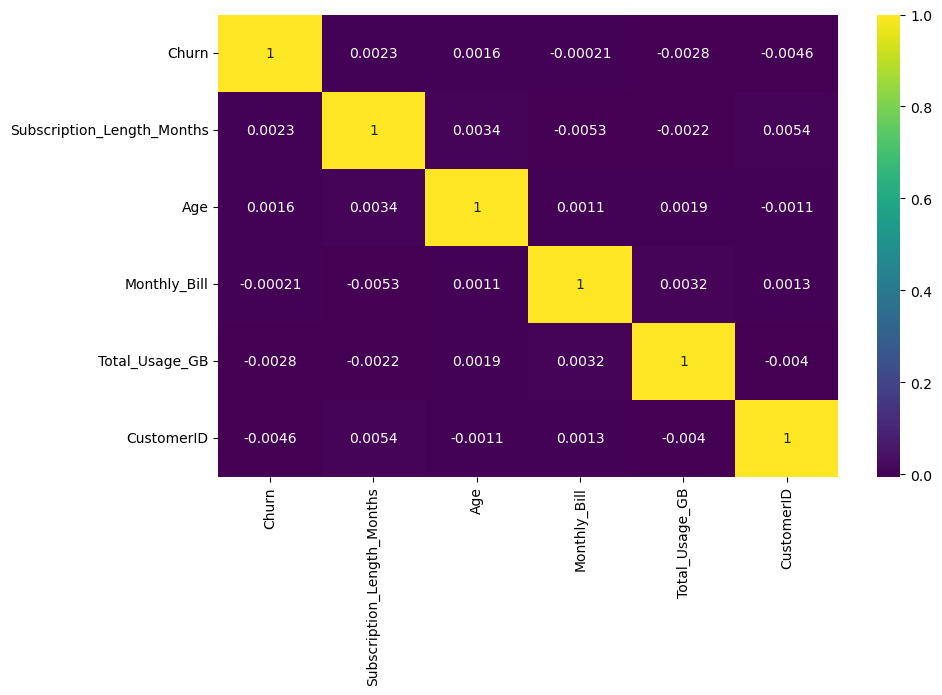

In [9]:
k = 9
cols = df.corr().nlargest(k, 'Churn')['Churn'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

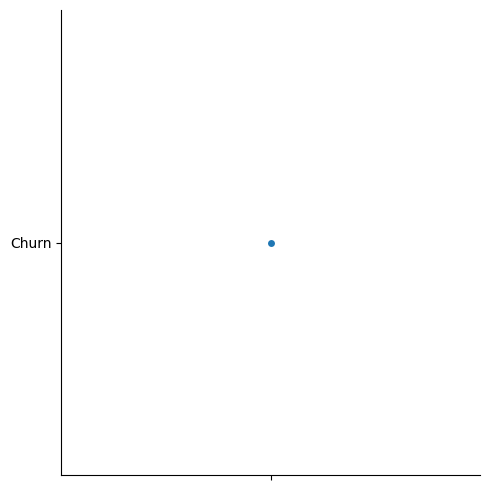

In [10]:
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()

                
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CustomerID has  None Outliers
Age has  None Outliers
Subscription_Length_Months has  None Outliers
Monthly_Bill has  None Outliers
Total_Usage_GB has  None Outliers


In [11]:
list = ["Gender", "Location"]
df = pd.get_dummies(df, columns =list, drop_first = True)

In [12]:
df = df.drop(["CustomerID","Name"], axis = 1)

**PREPROCESSING**

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Subscription_Length_Months'] = scaler.fit_transform(df[['Subscription_Length_Months']])
df['Monthly_Bill'] = scaler.fit_transform(df[['Monthly_Bill']])
df['Total_Usage_GB'] = scaler.fit_transform(df[['Total_Usage_GB']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [14]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,0.865385,0.695652,0.619429,0.413333,0,1,0,1,0,0
1,0.846154,0.000000,0.268000,0.271111,0,0,0,0,0,1
2,0.115385,0.173913,0.792429,0.911111,0,0,0,1,0,0
3,0.346154,0.086957,0.970571,0.548889,1,0,0,0,1,0
4,0.538462,0.782609,0.402000,0.480000,0,0,0,0,1,0


In [15]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90000, 9), (10000, 9), (90000,), (10000,))

In [17]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print("Accuracy score of Logistic Regression is: ", LR.score(X_test, y_test))
y_pred = LR.predict(X_test)

print("The precision score of Logistic Regression is: ", precision_score(y_test, y_pred))
print("The recall score of Logistic Regression is: ", recall_score(y_test, y_pred))
print("The F1 score of Logistic Regression is: ", f1_score(y_test, y_pred))

Accuracy score of Logistic Regression is:  0.4995
The precision score of Logistic Regression is:  0.49868212967843967
The recall score of Logistic Regression is:  0.3787787787787788
The F1 score of Logistic Regression is:  0.4305381727158949


In [18]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)
print("Accuracy score of Gradient Boost is: ", GB.score(X_test, y_test))
y_pred = GB.predict(X_test)

print("The precision score of Gradient Boost is: ", precision_score(y_test, y_pred))
print("The recall score of Gradient Boost is: ", recall_score(y_test, y_pred))
print("The F1 score of Gradient Boost is: ", f1_score(y_test, y_pred))


Accuracy score of Gradient Boost is:  0.4988
The precision score of Gradient Boost is:  0.49792328365502075
The recall score of Gradient Boost is:  0.408008008008008
The F1 score of Gradient Boost is:  0.44850352112676056


In [55]:
print(classification_report(GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54      5907
           1       0.41      0.50      0.45      4093

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.52      0.50      0.50     10000



In [56]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

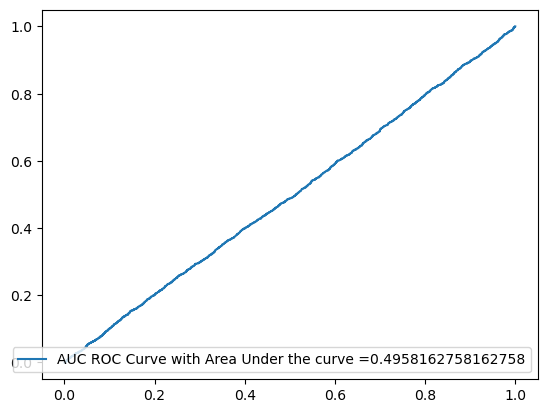

In [57]:
generate_auc_roc_curve(GB, X_test)

In [19]:
LGBM = LGBMClassifier()
LGBM.fit(X_train,y_train)
print("Accuracy score of Light BGM is: ", LGBM.score(X_test, y_test))
y_pred = LGBM.predict(X_test)

print("The precision score of Gradient Boost is: ", precision_score(y_test, y_pred))
print("The recall score of Gradient Boost is: ", recall_score(y_test, y_pred))
print("The F1 score of Gradient Boost is: ", f1_score(y_test, y_pred))


Accuracy score of Light BGM is:  0.4986
The precision score of Gradient Boost is:  0.49763857817549095
The recall score of Gradient Boost is:  0.4008008008008008
The F1 score of Gradient Boost is:  0.44400088711465957


In [59]:
lgb_model = LGBMClassifier()

lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

gbm_model = GradientBoostingClassifier()

gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)

models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LightGBM: 0.503160 (0.005019)
GB: 0.503180 (0.005338)


In [29]:
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 51994 to 15795
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         90000 non-null  float64
 1   Subscription_Length_Months  90000 non-null  float64
 2   Monthly_Bill                90000 non-null  float64
 3   Total_Usage_GB              90000 non-null  float64
 4   Gender_Male                 90000 non-null  uint8  
 5   Location_Houston            90000 non-null  uint8  
 6   Location_Los Angeles        90000 non-null  uint8  
 7   Location_Miami              90000 non-null  uint8  
 8   Location_New York           90000 non-null  uint8  
dtypes: float64(4), uint8(5)
memory usage: 3.9 MB


In [47]:
model = keras.Sequential(layers=[
    keras.layers.Dense(units=64, activation="relu", input_shape=(X_train.shape[1], )),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=128, activation="tanh"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=128, activation="tanh"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=1, activation="sigmoid")
])

In [48]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                640       
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)               

In [50]:
model.fit(x=X_train, y=y_train, batch_size=1000, epochs=50, validation_split=0.2)

Epoch 1/50
72/72 [==============================] - 3s 20ms/step - loss: 0.6947 - accuracy: 0.4989 - val_loss: 0.6934 - val_accuracy: 0.4966
Epoch 2/50
72/72 [==============================] - 1s 18ms/step - loss: 0.6936 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5026
Epoch 3/50
72/72 [==============================] - 1s 17ms/step - loss: 0.6933 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.5018
Epoch 4/50
72/72 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.4962
Epoch 5/50
72/72 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.5092 - val_loss: 0.6933 - val_accuracy: 0.4944
Epoch 6/50
72/72 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6937 - val_accuracy: 0.4953
Epoch 7/50
72/72 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 8/50
72

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4963


[0.6937474012374878, 0.49630001187324524]